In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pp=pd.read_csv(r"D:\Dataset_python/Property_Price_Train (1).csv")

In [2]:
pp.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pp.isnull().sum()[pp.isnull().sum()>0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type         871
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [12]:
pp.isnull().sum()[pp.isnull().sum()> pp.shape[0]*.4].index

Index([], dtype='object')

In [13]:
#pp.isnull().sum()[pp.isnull().sum()> pp.shape[0]*.4]

In [14]:
pp.shape

(1459, 75)

In [15]:
col_to_be_drop=list(pp.isnull().sum()[pp.isnull().sum()> pp.shape[0]*.4].index)
pp=pp.drop(col_to_be_drop,axis=1)

In [18]:
#filling nulls

pp.Lot_Extent.fillna(pp.Lot_Extent.mean(),inplace=True)
pp.Brick_Veneer_Area.fillna(pp.Brick_Veneer_Area.mean(),inplace=True)
pp.Basement_Height.fillna('TA',inplace=True)
pp.Exposure_Level.fillna('No',inplace=True)
pp.BsmtFinType1.fillna('Unf',inplace=True)
pp.BsmtFinType2.fillna('Unf',inplace=True)
pp.Basement_Condition.fillna('TA',inplace=True)
pp.Electrical_System.fillna('SBrkr',inplace=True)
pp.Garage.fillna('Attchd',inplace=True)
pp.Garage_Built_Year.fillna(pp.Garage_Built_Year.mean(),inplace=True)
pp.Garage_Finish_Year.fillna('Unf',inplace=True)
pp.Garage_Quality.fillna('TA',inplace=True)
pp.Garage_Condition.fillna('TA',inplace=True)
# pp.Fireplace_Quality.fillna('No Fireplace',inplace=True)
# pp.Brick_Veneer_Type.fillna('No Brick_Veneer',inplace=True)

In [19]:
pp.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom

In [20]:
pp=pp.drop(['Id'],axis=1)

In [21]:
pp.Year_Sold.replace({2006:1,2007:2,2008:3,2009:4,2010:5},inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
pp[pp.select_dtypes(include='object').columns]=pp[pp.select_dtypes(include='object').columns].apply(le.fit_transform)

In [24]:
pp.select_dtypes(include='object').columns

Index([], dtype='object')

In [25]:
pp.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,...,20.337934,0,0,0,0,2,3,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,15.039392,0,0,0,0,5,2,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,-46.232198,0,0,0,0,9,3,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,60.921821,0,0,0,0,2,1,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,21.788818,0,0,0,0,12,3,8,4,250000


In [26]:
from sklearn.model_selection import train_test_split

train_pp,test_pp=train_test_split(pp,test_size=0.25,random_state=111)

#random state --- setting the stste

In [27]:
train_pp_x=train_pp.iloc[:,0:-1]
train_pp_y=train_pp.iloc[:,-1]

test_pp_x=test_pp.iloc[:,0:-1]
test_pp_y=test_pp.iloc[:,-1]

In [28]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(train_pp_x,train_pp_y)

LinearRegression()

In [29]:
Rsquare=linreg.score(train_pp_x,train_pp_y)
Rsquare

0.851340912251612

In [30]:
N=train_pp_x.shape[0]
K=train_pp_x.shape[1]
Adj_Rsq=1-(1-Rsquare)*(N-1)/(N-K-1)
Adj_Rsq

0.840701585383345

In [38]:
#any model
#3 main aim
#1 aim :- as good as possible(Rsquare,ad,mape,mse)
#2 aim:- Model stable as possible
#3 aim:- Build the model using as less variables as possible without comprimising much on the performance of the model

In [46]:
col_to_be_drop=list(pp.isnull().sum()[pp.isnull().sum()> pp.shape[0]*.4].index)
pp=pp.drop(col_to_be_drop,axis=1)

In [43]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pp=pd.read_csv(r"D:\Dataset_python/Property_Price_Train (1).csv")

col_to_be_drop=list(pp.isnull().sum()[pp.isnull().sum()> pp.shape[0]*.4].index)

col_to_be_drop
pp=pp.drop(col_to_be_drop,axis=1)

pp.Lot_Extent.fillna(pp.Lot_Extent.mean(),inplace=True)
pp.Brick_Veneer_Area.fillna(pp.Brick_Veneer_Area.mean(),inplace=True)
pp.Basement_Height.fillna('TA',inplace=True)
pp.Exposure_Level.fillna('No',inplace=True)
pp.BsmtFinType1.fillna('Unf',inplace=True)
pp.BsmtFinType2.fillna('Unf',inplace=True)
pp.Basement_Condition.fillna('TA',inplace=True)
pp.Electrical_System.fillna('SBrkr',inplace=True)
pp.Garage.fillna('Attchd',inplace=True)
pp.Garage_Built_Year.fillna(pp.Garage_Built_Year.mean(),inplace=True)
pp.Garage_Finish_Year.fillna('Unf',inplace=True)
pp.Garage_Quality.fillna('TA',inplace=True)
pp.Garage_Condition.fillna('TA',inplace=True)

pp=pp.drop(['Id'],axis=1)


pp.Year_Sold.replace({2006:1,2007:2,2008:3,2009:4,2010:5},inplace=True)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

pp[pp.select_dtypes(include='object').columns]=pp[pp.select_dtypes(include='object').columns].apply(le.fit_transform)

In [44]:
pp.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,...,20.337934,0,0,0,0,2,3,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,15.039392,0,0,0,0,5,2,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,-46.232198,0,0,0,0,9,3,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,60.921821,0,0,0,0,2,1,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,21.788818,0,0,0,0,12,3,8,4,250000


In [47]:
pp.shape

(1459, 74)

In [48]:
pp_x=pp.iloc[:,0:-1]
corr_list=[]

In [49]:
for col in pp_x.columns:
    corr_list.append(pp.Sale_Price.corr(pp_x[col]))
# corr_list

In [50]:
len(corr_list)

73

In [51]:
feat_imp=pd.DataFrame() 
feat_imp['Features']=pp_x.columns
feat_imp['Corr']=corr_list

feat_imp

,Features,Corr
0,Building_Class,-0.084563
1,Zoning_Class,-0.166896
2,Lot_Extent,0.334992
3,Lot_Size,0.263843
4,Road_Type,0.041057
...,...,...
68,Miscellaneous_Value,-0.021216
69,Month_Sold,0.046401
70,Year_Sold,-0.028884
71,Sale_Type,-0.054826


In [52]:
feat_imp[(feat_imp['Corr']>0.1) | (feat_imp['Corr']<-0.1) ]
l1=list(feat_imp[(feat_imp['Corr']>0.1) | (feat_imp['Corr']<-0.1) ].Features)
l1.append('Sale_Price')

In [53]:
pp=pp.loc[:,l1]

In [54]:
pp.shape

(1459, 46)

In [55]:
pp.head()

,Zoning_Class,Lot_Extent,Lot_Size,Property_Shape,Neighborhood,House_Design,Overall_Material,Construction_Year,Remodel_Year,Roof_Design,...,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Condition,Pavedd_Drive,Screen_Lobby_Area,Sale_Condition,Sale_Price
0,3,65.0,8450,3,5,5,7,2003,2003,1,...,0,2,2003.0,1,2,4,2,0,4,208500
1,3,80.0,9600,3,24,2,6,1976,1976,1,...,1,2,1976.0,1,2,4,2,0,4,181500
2,3,68.0,11250,0,5,5,7,2001,2002,1,...,1,2,2001.0,1,2,4,2,0,4,223500
3,3,60.0,9550,0,6,5,7,1915,1970,1,...,1,6,1998.0,2,3,4,2,0,0,140000
4,3,84.0,14260,0,15,5,8,2000,2000,1,...,1,2,2000.0,1,3,4,2,0,4,250000


In [56]:
df1=pp

In [57]:
#Lets select only those columns which have high corelation 
#with target variables

In [58]:
from sklearn.model_selection import train_test_split

train_pp,test_pp=train_test_split(pp,test_size=0.25,random_state=111)

train_pp_x=train_pp.iloc[:,0:-1]
train_pp_y=train_pp.iloc[:,-1]

test_pp_x=test_pp.iloc[:,0:-1]
test_pp_y=test_pp.iloc[:,-1]

In [59]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(train_pp_x,train_pp_y)

LinearRegression()

In [60]:
Rsquare=linreg.score(train_pp_x,train_pp_y)
Rsquare

0.8388313495331703

In [61]:
N=train_pp_x.shape[0]
K=train_pp_x.shape[1]
Adj_Rsq=1-(1-Rsquare)*(N-1)/(N-K-1)
Adj_Rsq

0.8319109399234305

In [62]:
pred_train_pp=linreg.predict(train_pp_x)
pred_train_pp

array([ 67629.58181492, 104477.90874623, 180206.32209376, ...,
       190642.67363798, 344277.50017202, 133364.22345352])

In [63]:
#feature importance ---> feature selection
#validation is being done while building a model
#Testing is done after building a model

In [64]:
err_train_pp=train_pp_y-pred_train_pp
err_train_pp

1200    48420.418185
634     39522.091254
367    -15206.322094
1439    25577.457737
228     15759.250072
            ...     
681     43702.824996
1299    -1021.151352
86     -16642.673638
724    -24277.500172
876     -1114.223454
Name: Sale_Price, Length: 1094, dtype: float64

In [65]:
err_train_pp.mean()

-3.878737185184437e-11

In [66]:
err_train_pp.skew()

-0.7206606111519593

In [67]:
err_train_pp.kurtosis()+3

25.319831769360636

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   5.,   6.,  27.,  94., 232., 349., 233.,  93.,  28.,
          7.,   8.,   4.,   0.,   1.,   0.,   0.,   4.]),
 array([-311524.21996174, -294728.15957759, -277932.09919344,
        -261136.03880929, -244339.97842514, -227543.91804099,
        -210747.85765684, -193951.79727269, -177155.73688854,
        -160359.67650439, -143563.61612024, -126767.5557361 ,
        -109971.49535195,  -93175.4349678 ,  -76379.37458365,
         -59583.3141995 ,  -42787.25381535,  -25991.1934312 ,
          -9195.13304705,    7600.9273371 ,   24396.98772125,
          41193.0481054 ,   57989.10848954,   74785.16887369,
          91581.22925784,  108377.28964199,  125173.35002614,
         141969.41041029,  158765.47079444,  175561.53117859,
         192357.59156274]),
 <BarContainer object of 30 artists>)

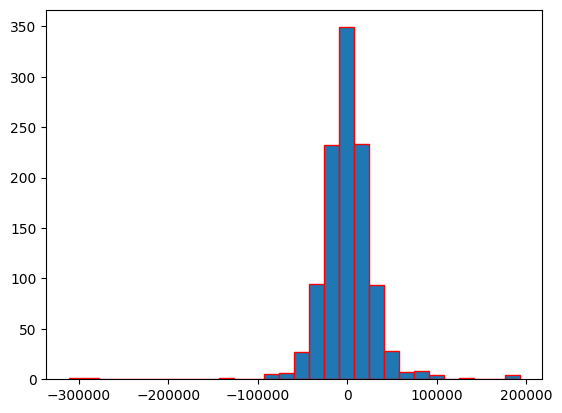

In [68]:
import matplotlib.pyplot as plt
plt.hist(err_train_pp,bins=30,edgecolor='red')

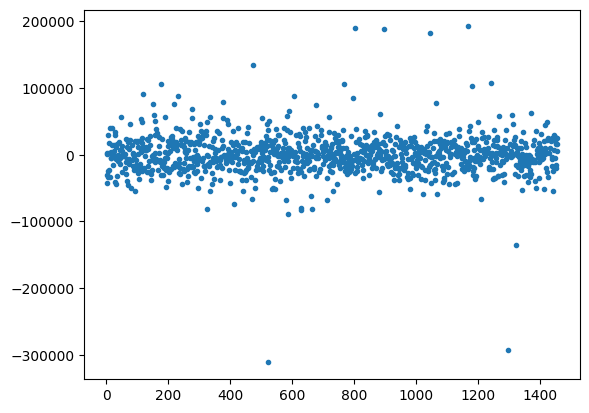

In [69]:
plt.plot(err_train_pp,'.')

<Axes: ylabel='Sale_Price'>

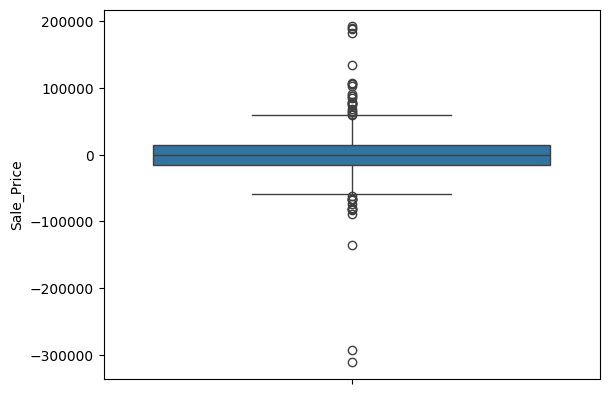

In [70]:
import seaborn as sns
sns.boxplot(err_train_pp)

In [71]:
actual_pred=pd.DataFrame()
actual_pred['Actual']=train_pp_y
actual_pred['Predicted']=pred_train_pp

<Axes: xlabel='Actual', ylabel='Predicted'>

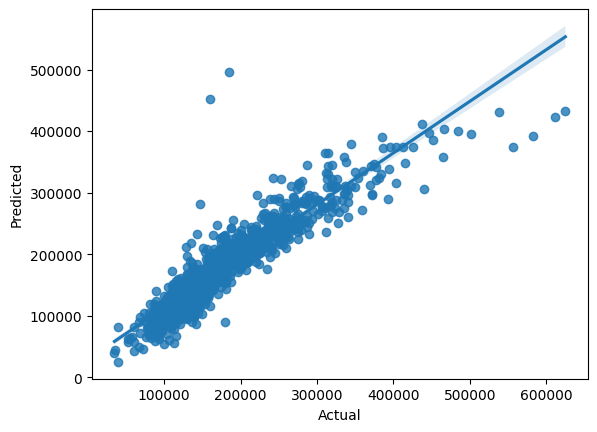

In [72]:
import seaborn as sns
sns.regplot(x='Actual',y='Predicted',data=actual_pred)

In [73]:
# outliers will be remove from entire data

In [74]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean- k * sd)]
    final_list=[x for x in final_list if (x < mean + k * sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("numbers of outliers removed ====>" , df.shape[0] - df1.shape[0])

remove_outliers(pp,'Sale_Price',2)

(1396, 46)
numbers of outliers removed ====> 63


In [81]:
#MSE,RMSE,MAPE

import numpy as np
mse=np.mean(np.square(err_train_pp))
mse

941870884.4999362

In [82]:
#calculating RMSE:
rmse_train=np.sqrt(mse)
rmse_train

30689.915029206844

In [83]:
#MAPE

from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(train_pp_y,pred_train_pp)*100

11.59016229724093